In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from helper_functions import *

df_untarget = pd.read_csv('resultsCIFAR10untarget_.csv')
df_target = pd.read_csv('resultsCIFAR10target_.csv')
sns.set_theme(style="whitegrid")
palette = sns.color_palette("hls", 6)

# Untargeted attack

## Metrics


* Success Rate by Pixel & Model
* Success Rate by Class Label & Pixel Count
* Confusion matrix
* Average Confidence / Adversarial Probability Labels
* Confidence Difference Boxplots
* Identifyling Outliers


In [33]:
model_names = ["All Convolution", "Network in Network", "VGG16"]
pixel_counts = [1,2,3,4,5,6]

model_tables, conf_matrix_set = summary_tables(df_untarget)

## Success Rate by Pixel & Model

In [34]:
get_success_rate_table_by_pixel_count(df_untarget)

c:\Users\Ola\Documents\GitHub\OnePixelAttack-CIFAR10\results\helper_functions.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,19.11%,45.07%,58.55%,60.76%,63.78%,62.37%
Network in Network,26.76%,58.35%,69.42%,70.82%,73.24%,72.03%
VGG16,18.31%,44.47%,58.95%,62.37%,62.37%,63.38%


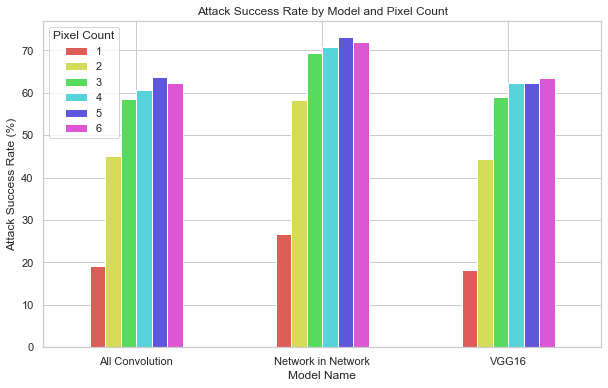

In [35]:
plot_success_rate_by_pixel_count(df_untarget)


## Success Rate by Class Label & Pixel Count

In [36]:
model_tables["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,12.24%,26.53%,36.73%,46.94%,46.94%,46.94%
1,0.00%,20.41%,28.57%,36.73%,46.94%,44.90%
2,18.00%,54.00%,74.00%,74.00%,78.00%,84.00%
3,36.00%,60.00%,78.00%,80.00%,80.00%,74.00%
4,32.00%,62.00%,72.00%,70.00%,72.00%,72.00%
5,36.00%,68.00%,80.00%,80.00%,80.00%,80.00%
6,20.00%,44.00%,56.00%,56.00%,60.00%,56.00%
7,12.24%,42.86%,57.14%,59.18%,57.14%,57.14%
8,12.00%,46.00%,60.00%,68.00%,74.00%,76.00%


In [37]:
model_tables["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,16.33%,40.82%,51.02%,59.18%,57.14%,59.18%
1,18.37%,51.02%,67.35%,75.51%,77.55%,67.35%
2,30.00%,66.00%,80.00%,80.00%,84.00%,84.00%
3,56.00%,82.00%,80.00%,82.00%,84.00%,84.00%
4,40.00%,68.00%,80.00%,76.00%,80.00%,84.00%
5,24.00%,60.00%,72.00%,74.00%,76.00%,78.00%
6,22.00%,50.00%,68.00%,58.00%,64.00%,64.00%
7,22.45%,61.22%,69.39%,69.39%,67.35%,67.35%
8,28.00%,66.00%,80.00%,90.00%,96.00%,86.00%


In [38]:
model_tables["VGG16"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,16.33%,28.57%,32.65%,32.65%,32.65%,34.69%
1,4.08%,8.16%,22.45%,30.61%,32.65%,42.86%
2,14.00%,50.00%,68.00%,76.00%,84.00%,78.00%
3,38.00%,64.00%,72.00%,78.00%,74.00%,74.00%
4,24.00%,62.00%,76.00%,76.00%,74.00%,74.00%
5,18.00%,52.00%,72.00%,76.00%,70.00%,72.00%
6,18.00%,46.00%,60.00%,60.00%,64.00%,60.00%
7,14.29%,38.78%,55.10%,57.14%,57.14%,57.14%
8,18.00%,58.00%,82.00%,86.00%,80.00%,92.00%


c:\Users\Ola\Documents\GitHub\OnePixelAttack-CIFAR10\results\helper_functions.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


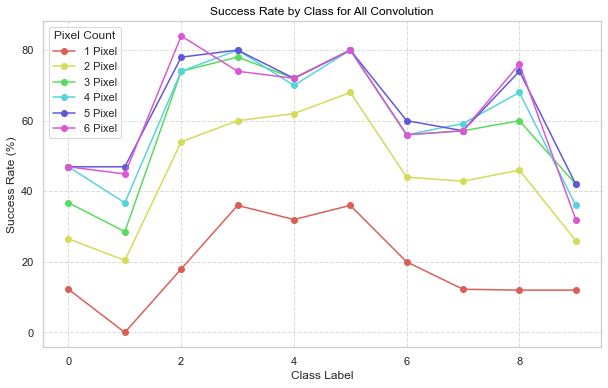

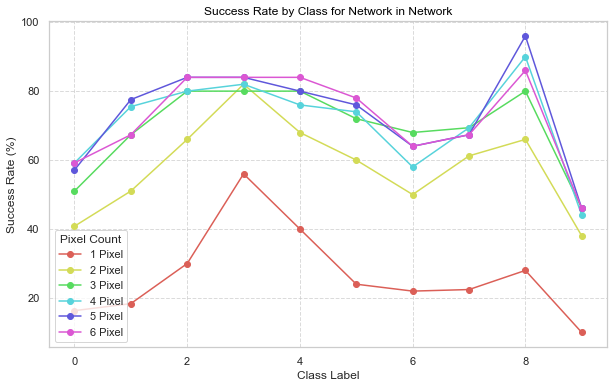

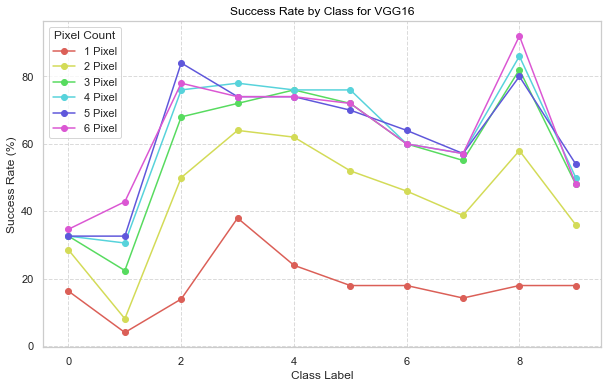

In [39]:
plot_success_rate_by_class(model_tables)

## Confusion matrices

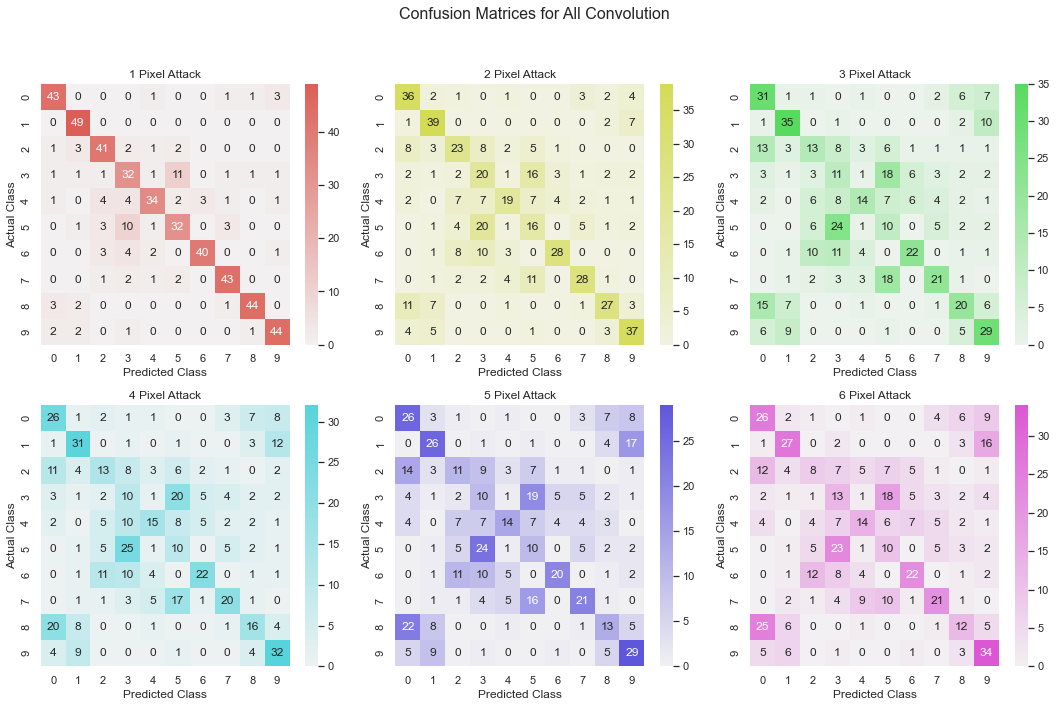

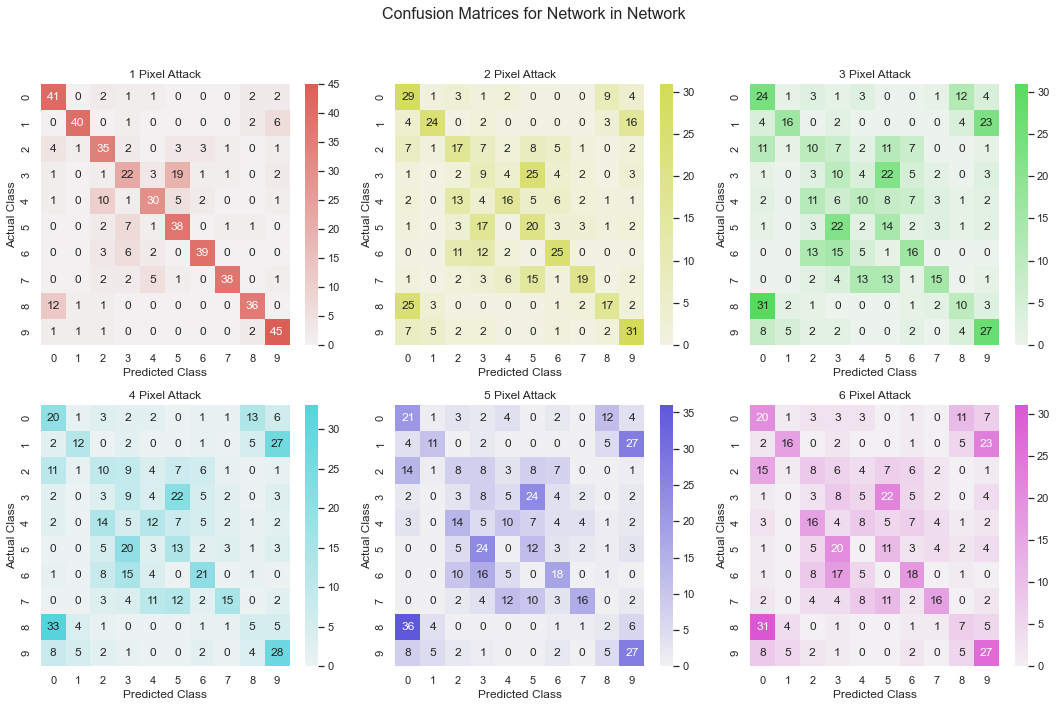

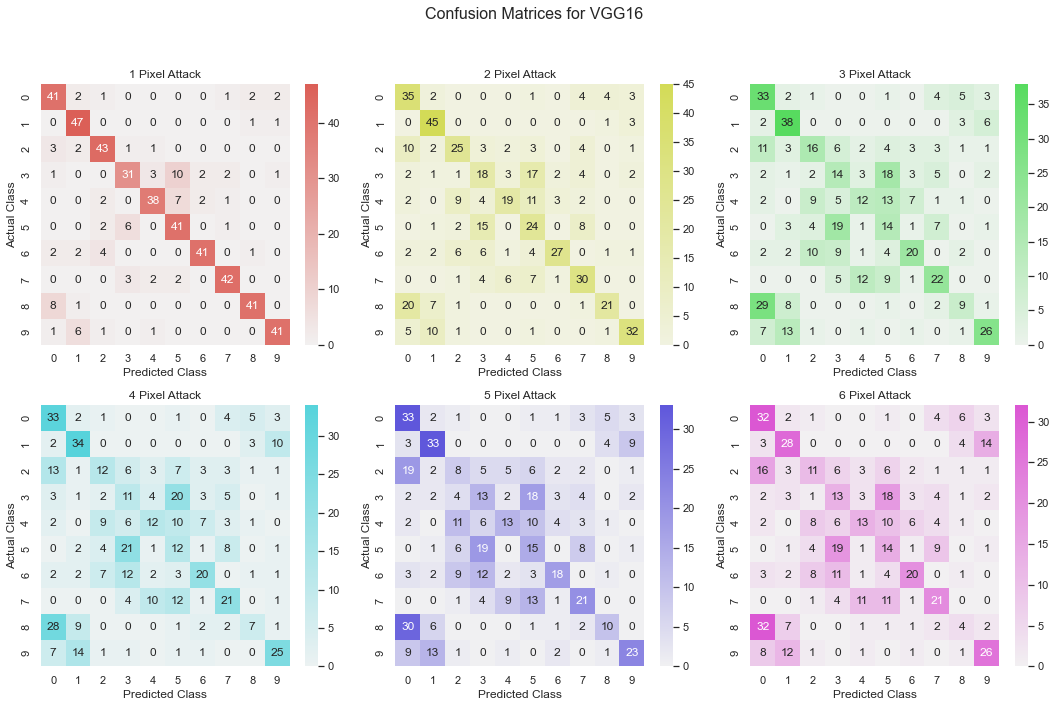

In [40]:
plot_confusion_matrices_by_model(model_tables, conf_matrix_set, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [41]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df_untarget['predicted_probs'] = df_untarget['predicted_probs'].apply(convert_to_array)
df_untarget['pred_conf'] = df_untarget.apply(get_pred_conf, axis=1)
calculate_confidence_means(df_untarget)

pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,63.46%,61.64%,63.72%,65.95%,67.25%,69.28%
Network in Network,58.79%,57.49%,59.22%,61.44%,62.62%,64.67%
VGG16,63.16%,60.89%,61.39%,64.21%,66.22%,68.03%


## Confidence Difference Boxplots



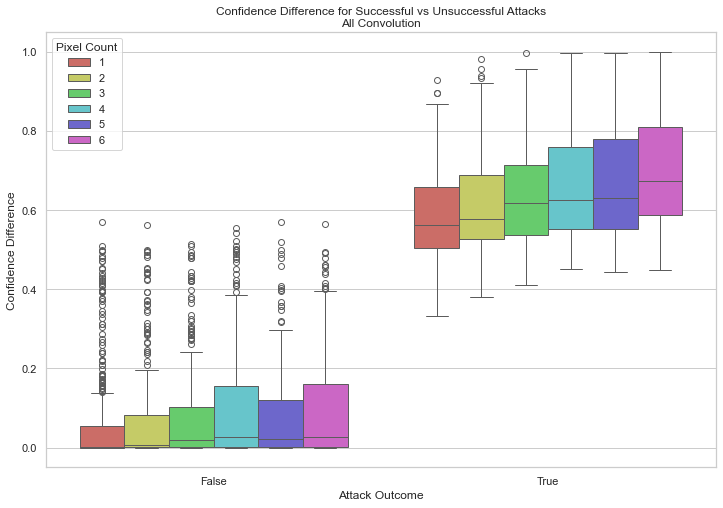

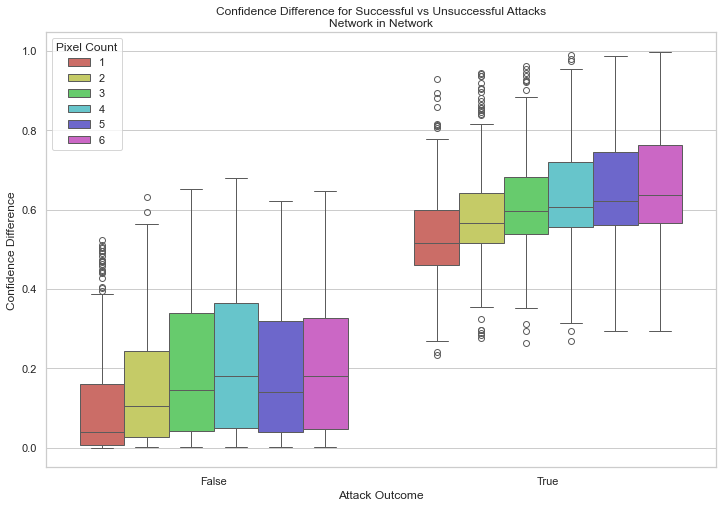

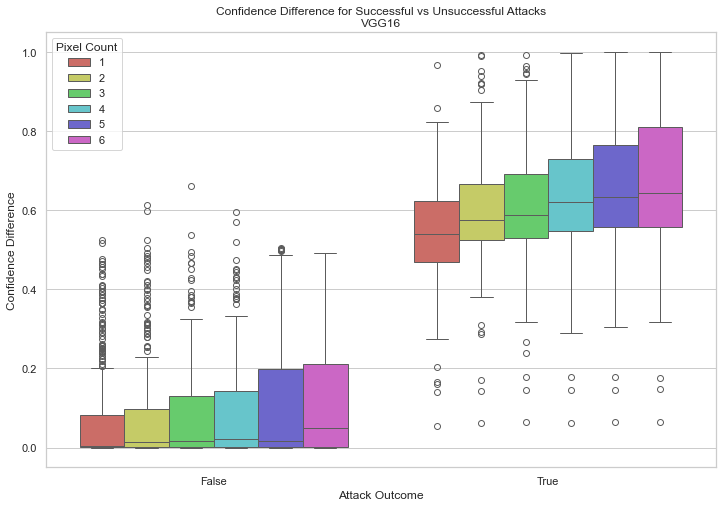

In [42]:
for model in model_names:
  confidence_diff_boxplot(df_untarget, model_names=[model], pixel_counts=pixel_counts)

## Identifyling Outliers

In [43]:
outliers_AllConv_untarget = identify_outliers(df_untarget, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_Nin_untarget = identify_outliers(df_untarget, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_VGG16_untarget = identify_outliers(df_untarget, model_names=['VGG16'], pixel_counts=pixel_counts)
outliers_df_untarget = pd.concat([outliers_AllConv_untarget, outliers_Nin_untarget, outliers_VGG16_untarget], axis=0, ignore_index=True)

C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/2518277303.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/2518277303.py:17: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/2518277303.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=outliers_by_pixel.index, y=outliers_by_pixel.values, palette=palette)


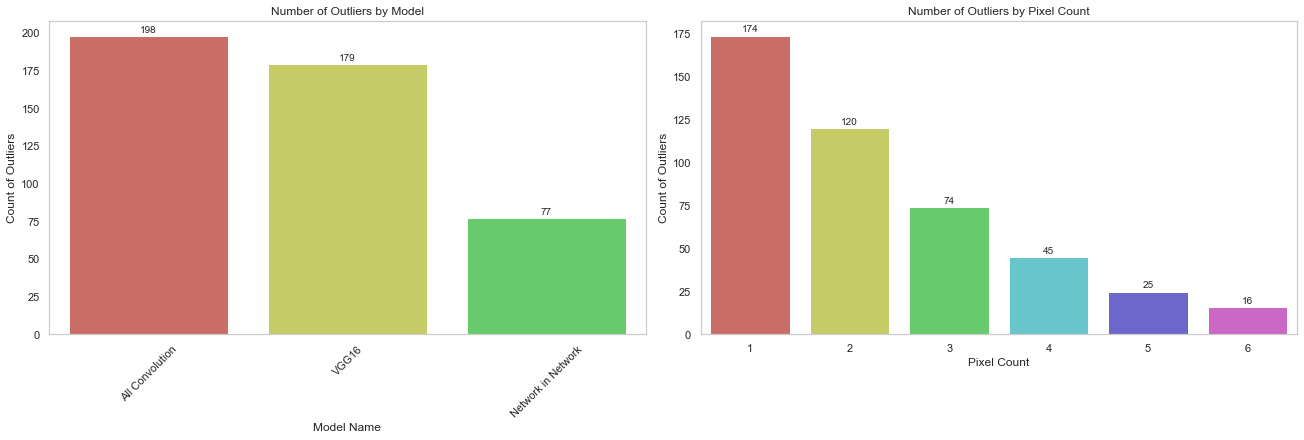

In [ ]:
plot_outliers(outliers_df_untarget)

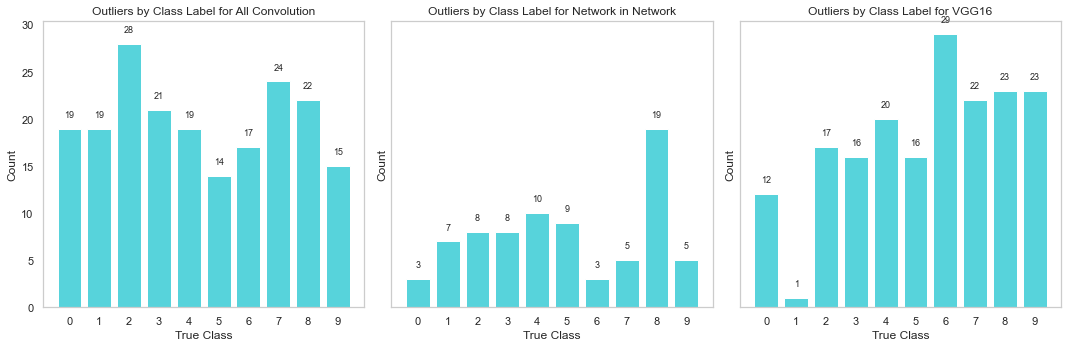

In [45]:
outliers_by_class_label(outliers_df_untarget)

# Targeted attack

## Targeted Success Rate by Pixel & model

In [47]:
success_table = get_targeted_success_rate_table_by_pixel_count(df_target)
success_table

c:\Users\Ola\Documents\GitHub\OnePixelAttack-CIFAR10\results\helper_functions.py:366: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,3.00%,10.22%,18.11%,20.44%,20.33%,19.11%
Network in Network,4.89%,17.00%,25.22%,27.67%,28.22%,27.89%
VGG16,2.56%,9.33%,16.89%,20.44%,19.56%,21.22%


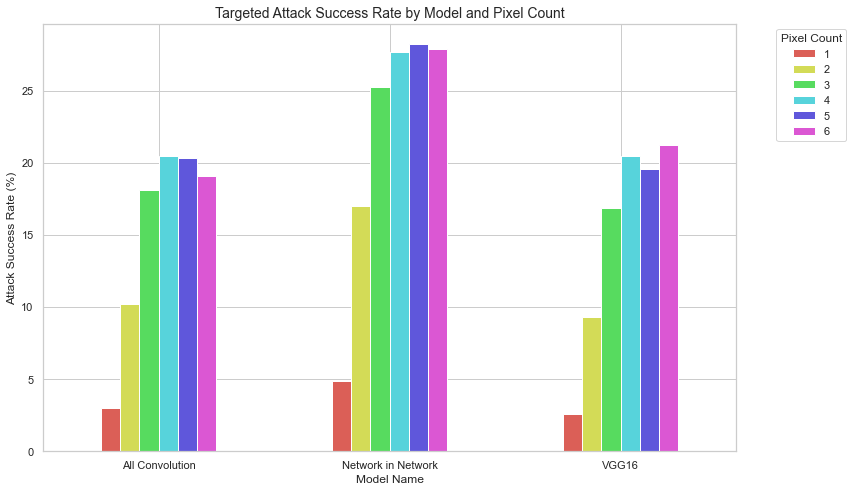

In [48]:
plot_targeted_success_rate_by_pixel_count(success_table)

## Untargeted Success Rate by Pixel & model

* average number of images successfully attacked at least once

In [49]:
broad_targeting_success_rate(df_target)

pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,20.0%,47.0%,64.0%,69.0%,70.0%,70.0%
Network in Network,35.0%,72.0%,79.0%,81.0%,81.0%,84.0%
VGG16,19.0%,47.0%,67.0%,69.0%,71.0%,73.0%


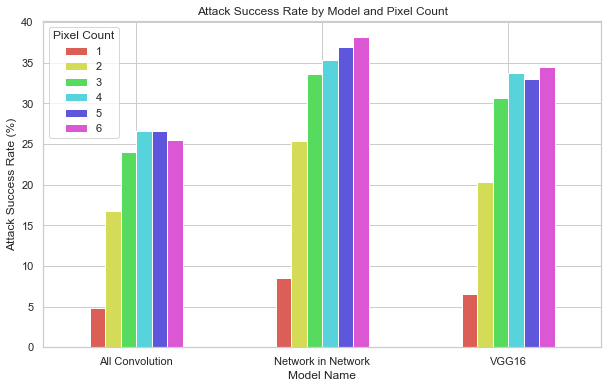

In [50]:
plot_success_rate_by_pixel_count(df_target)

## Success Rate by Class Label & Pixel Count

In [51]:
# Initialize dictionaries for results
model_tables_target , conf_matrix_set_target = summary_tables(df_target, targeted = True)

In [52]:
model_tables_target["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,3.33%,10.00%,17.78%,16.67%,16.67%,16.67%
1,0.00%,7.78%,11.11%,13.33%,15.56%,16.67%
2,1.11%,13.33%,25.56%,27.78%,26.67%,26.67%
3,6.67%,12.22%,23.33%,31.11%,26.67%,22.22%
4,5.56%,21.11%,31.11%,30.00%,28.89%,26.67%
5,5.56%,13.33%,21.11%,22.22%,22.22%,24.44%
6,5.56%,11.11%,24.44%,25.56%,30.00%,24.44%
7,0.00%,3.33%,8.89%,13.33%,8.89%,12.22%
8,1.11%,4.44%,10.00%,14.44%,16.67%,12.22%


In [53]:
model_tables_target["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,1.11%,12.22%,20.00%,22.22%,25.56%,24.44%
1,2.22%,11.11%,16.67%,18.89%,20.00%,21.11%
2,4.44%,13.33%,22.22%,27.78%,30.00%,33.33%
3,10.00%,28.89%,40.00%,43.33%,40.00%,44.44%
4,11.11%,20.00%,28.89%,30.00%,32.22%,30.00%
5,5.56%,17.78%,22.22%,26.67%,25.56%,26.67%
6,5.56%,21.11%,27.78%,24.44%,26.67%,28.89%
7,2.22%,16.67%,26.67%,32.22%,31.11%,26.67%
8,6.67%,20.00%,33.33%,37.78%,35.56%,33.33%


In [54]:
model_tables_target["VGG16"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,1.11%,5.56%,10.00%,12.22%,13.33%,12.22%
1,3.33%,4.44%,8.89%,12.22%,8.89%,13.33%
2,1.11%,3.33%,16.67%,20.00%,20.00%,24.44%
3,7.78%,16.67%,25.56%,30.00%,28.89%,30.00%
4,2.22%,15.56%,26.67%,27.78%,27.78%,25.56%
5,3.33%,11.11%,18.89%,20.00%,20.00%,25.56%
6,2.22%,11.11%,22.22%,26.67%,24.44%,27.78%
7,1.11%,6.67%,12.22%,15.56%,14.44%,13.33%
8,2.22%,15.56%,20.00%,27.78%,27.78%,28.89%


c:\Users\Ola\Documents\GitHub\OnePixelAttack-CIFAR10\results\helper_functions.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


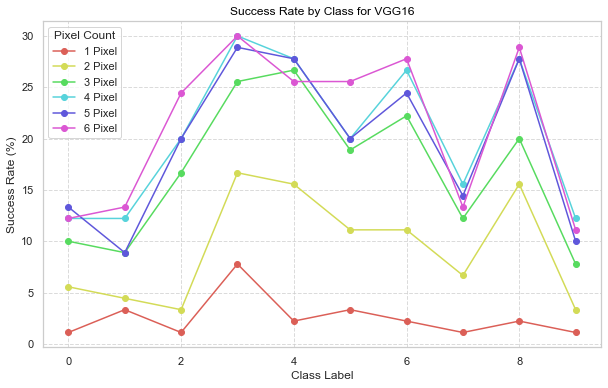

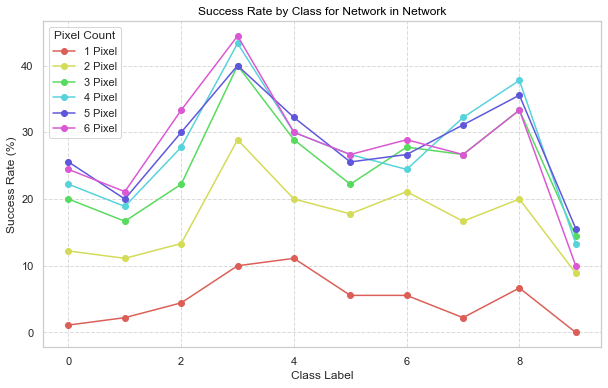

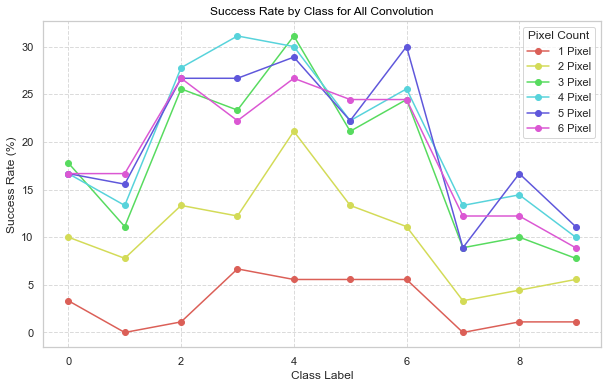

In [55]:
plot_success_rate_by_class(model_tables_target)

## Number of Target Classes

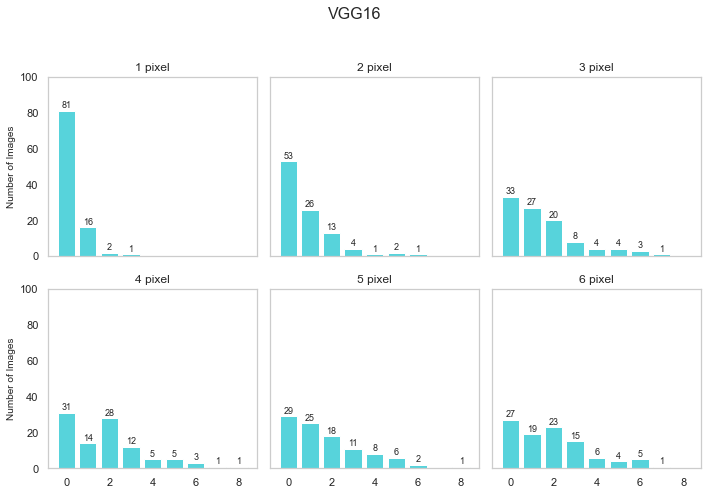

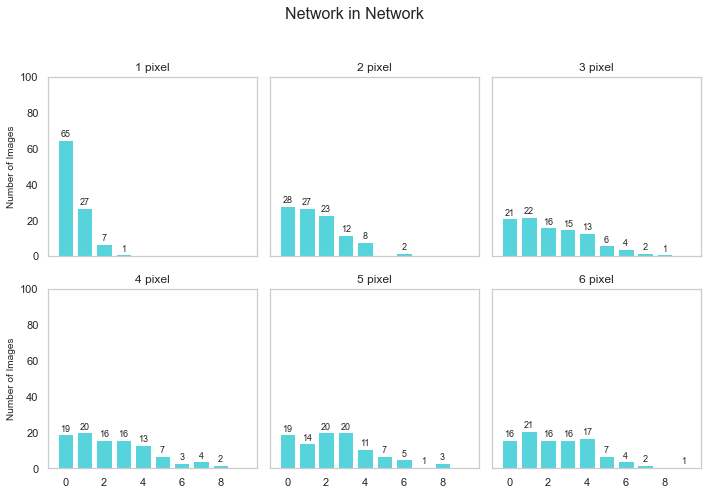

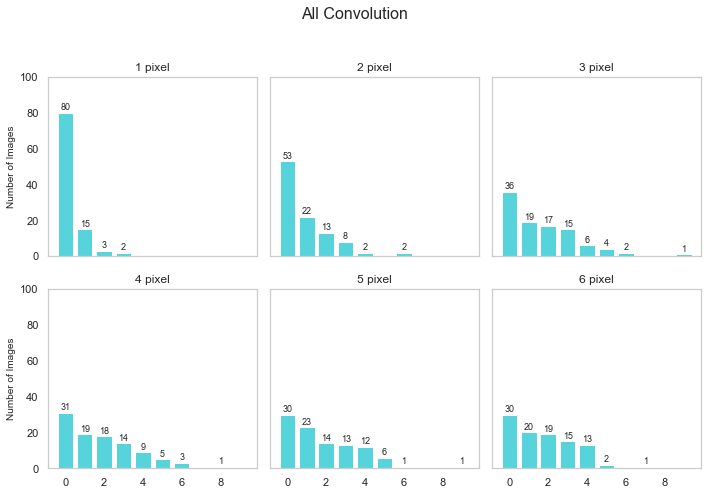

In [56]:
targeted_number_of_target_classes(df_target)

## Confusion Matrices

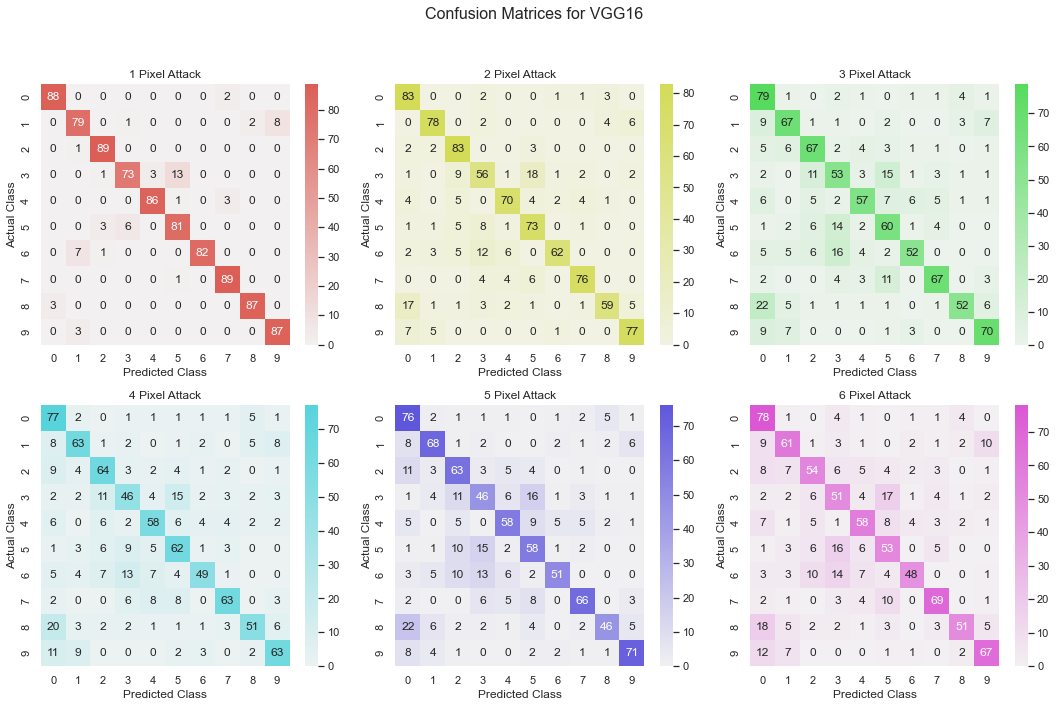

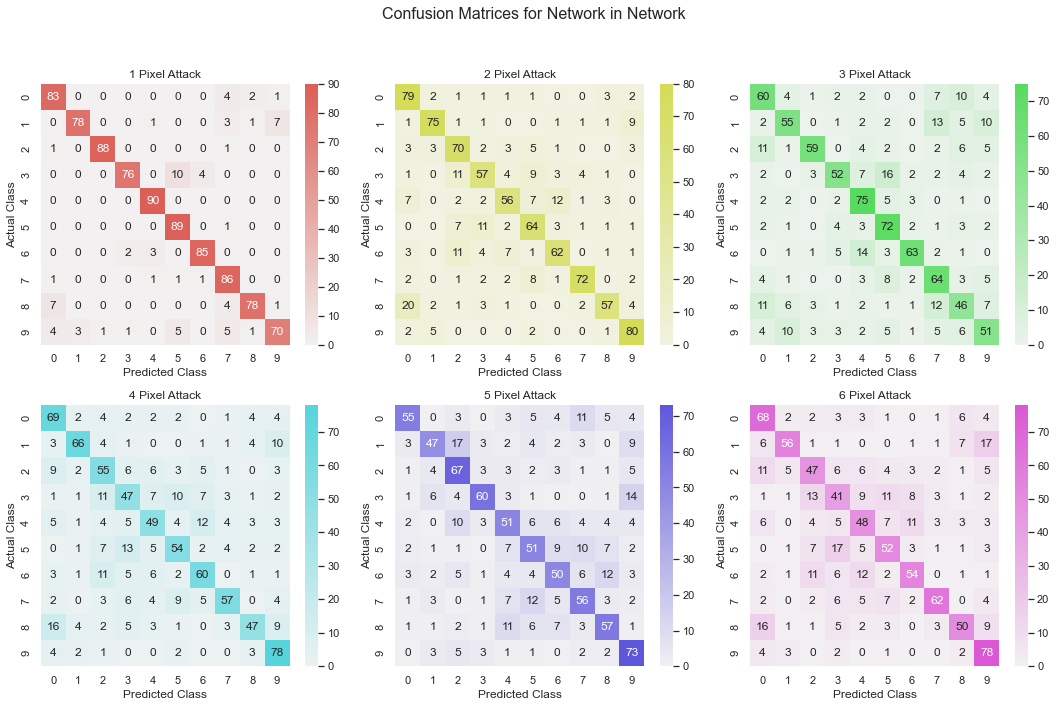

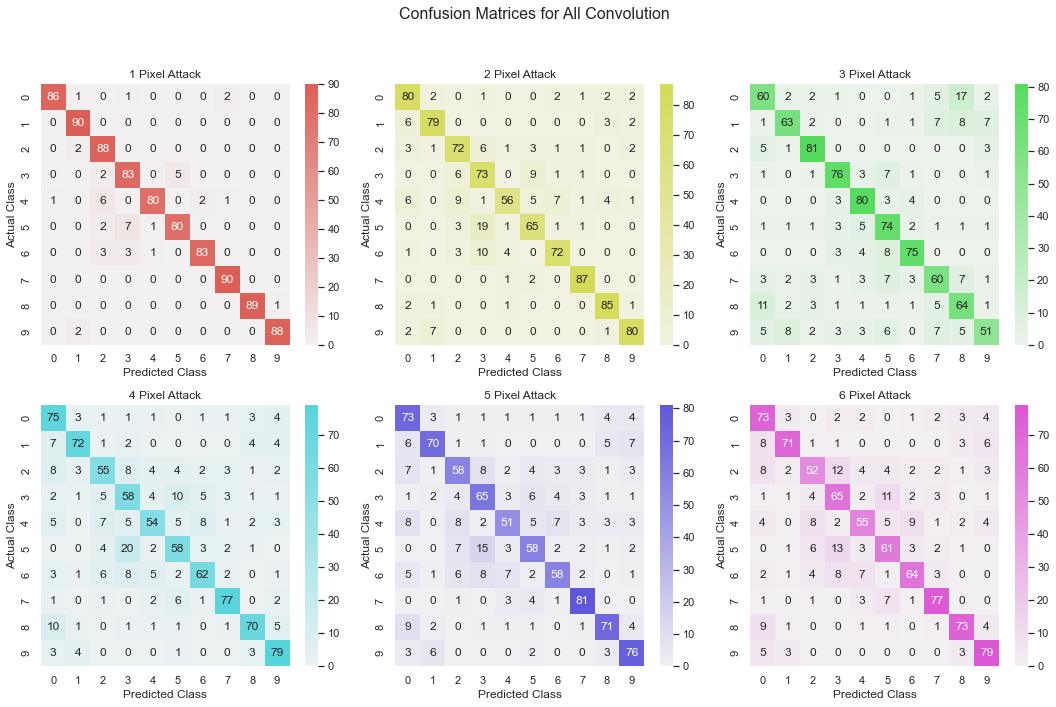

In [57]:
plot_confusion_matrices_by_model(model_tables_target, conf_matrix_set_target, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [58]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df_target['predicted_probs'] = df_target['predicted_probs'].apply(convert_to_array)
df_target['pred_conf'] = df_target.apply(get_pred_conf, axis=1)

calculate_confidence_means(df_target)

pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,58.46%,54.19%,54.53%,54.39%,55.67%,59.82%
Network in Network,51.35%,47.4%,46.65%,47.47%,48.01%,48.77%
VGG16,58.26%,53.71%,53.02%,53.3%,55.91%,56.06%


## Confidence Difference Boxplots

In [62]:
df_target['confidence_diff'] = abs(df_target['confidence_diff'])

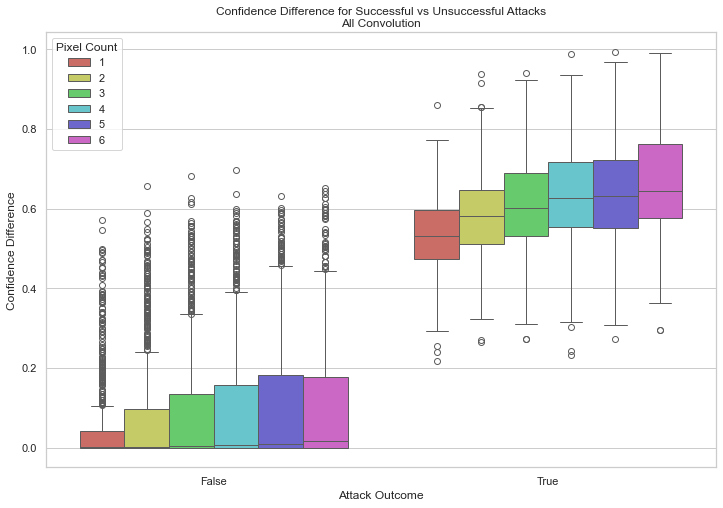

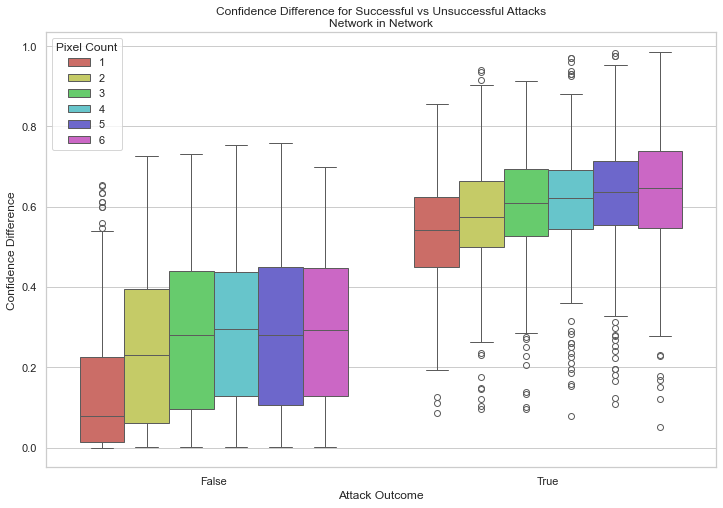

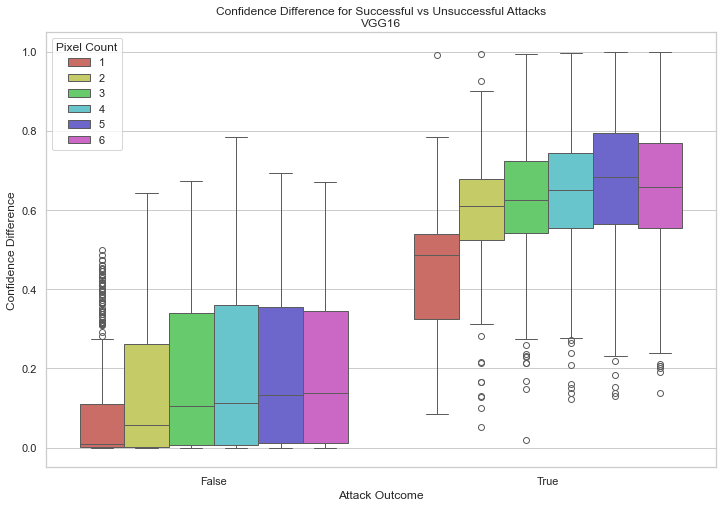

In [63]:
for model in model_names:
  confidence_diff_boxplot(df_target, model_names=[model], pixel_counts=pixel_counts)

## Identifying Outliers

C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/580718544.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/580718544.py:22: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
C:\Users\Ola\AppData\Local\Temp/ipykernel_10596/580718544.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=outliers_by_pixel.index, y=outliers_by_pixel.values, palette=palette)


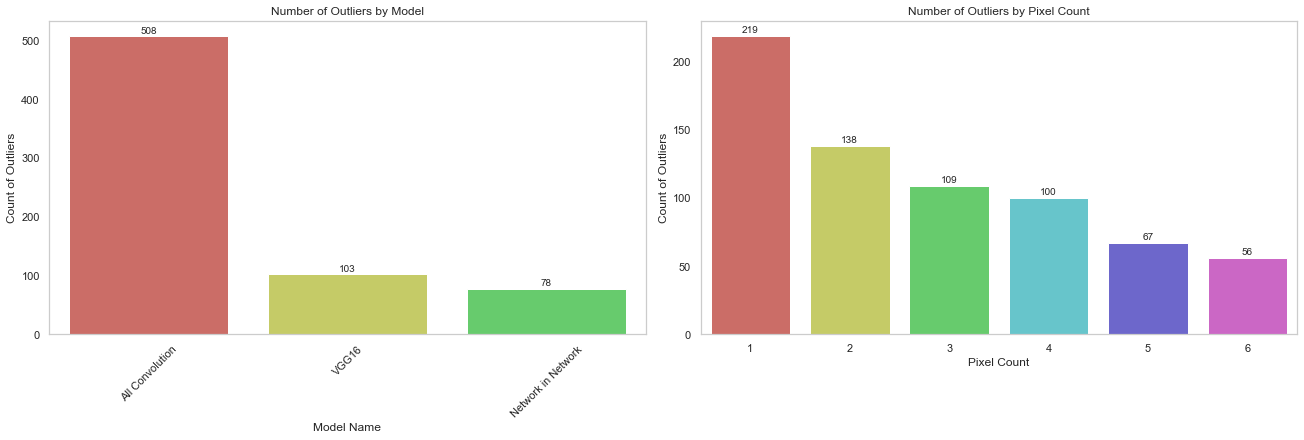

In [66]:
outliers_AllConv_target = identify_outliers(df_target, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_Nin_target = identify_outliers(df_target, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_VGG16_target = identify_outliers(df_target, model_names=['VGG16'], pixel_counts=pixel_counts)
outliers_df_target = pd.concat([outliers_AllConv_target, outliers_Nin_target, outliers_VGG16_target], axis=0, ignore_index=True)

plot_outliers(outliers_df_target)

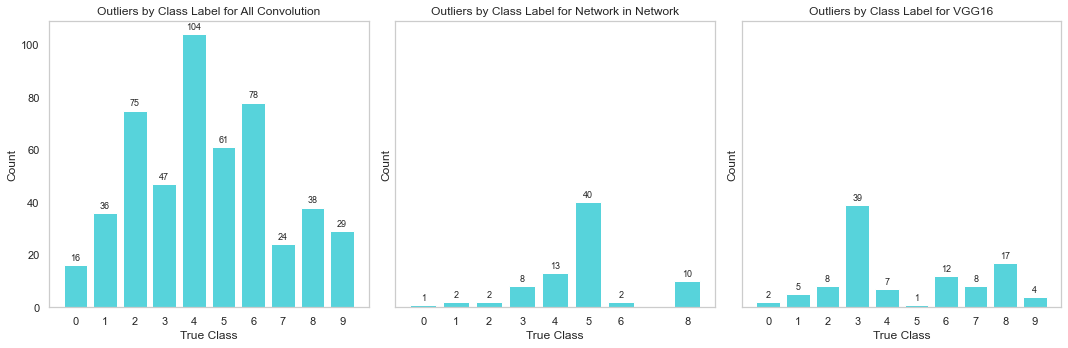

In [65]:
outliers_by_class_label(outliers_df_target)